In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

## Load your CSV files

In [2]:
train = pd.read_csv("../data/train_encoded.csv")
test = pd.read_csv("../data/test_encoded.csv")


## Assuming the target column is named 'Label'


In [3]:
X_train = train.drop(columns=['Label'])
y_train = train['Label']

X_test = test.drop(columns=['Label'])
y_test = test['Label']


In [4]:
X_train.head()

,URL,url_length,num_dots,num_hyphens,has_at,has_https,has_ip,count_suspicious_words
0,452940,29,2,0,0,0,0,0
1,455349,29,3,0,0,0,0,0
2,210650,27,1,0,0,0,0,0
3,355689,34,1,1,0,0,0,0
4,422046,23,2,0,0,0,0,0


## Define and train the Random Forest classifier


In [5]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# Make predictions
y_pred = rf_model.predict(X_test)

## Evaluate accuracy


In [7]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.85


## Generate classification report


In [8]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     78736
           1       0.68      0.65      0.67     22704

    accuracy                           0.85    101440
   macro avg       0.79      0.78      0.79    101440
weighted avg       0.85      0.85      0.85    101440



## Generate confusion matrix


In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)

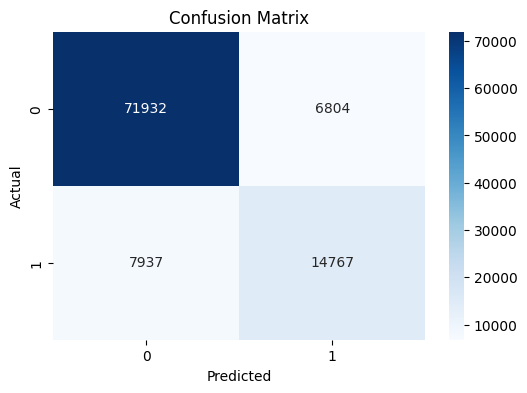

In [10]:
# Visualizing the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Save the Random Forest model


In [11]:
joblib.dump(rf_model, "../model/RandomForest_model_new.pkl")

['../model/RandomForest_model_new.pkl']